In [100]:
import pandas
import seaborn as sns
#Params
population_size=50
#Summarizes collected data, combining all indivs' from 1 generation.
def summarize_across_generations(dataframe):
    compressed_frame = dataframe.copy()
    compressed_frame.drop(compressed_frame.index, inplace=True)
    
    previous_generation = 0
    
    #Adding the first row
    compressed_frame.loc[previous_generation]=[0 for n in range(len(dataframe.columns))]
    population_counter = 0
    for indiv_count in range(len(dataframe)):
        #if indiv_count%population_size == 0:
        current_generation = dataframe["Generation"][indiv_count]
        if current_generation!=previous_generation:
            #Summarizing the previous row.
            compressed_frame.loc[previous_generation]/=population_counter
            #Adding a new row for the next generation.
            compressed_frame.loc[current_generation]=[0 for n in range(len(dataframe.columns))]
            previous_generation=current_generation
            population_counter = 0
        for column in dataframe:
            individual = dataframe[column][indiv_count]
            compressed_frame.iloc[-1, compressed_frame.columns.get_loc(column)]+=individual
        population_counter+=1
    
    compressed_frame.loc[previous_generation]/=population_counter
    return compressed_frame
        

In [2]:
#No initial ammo, but there is plenty of ammo to pick up. Death penalty
#is quite high.
#Gathering all paths here. Top-level folder paths here, file paths in cell below
#Should only need to change the following folder name:
EXPERIMENT_SUBFOLDER = "D3_battle_tiny_health_no_ammo"
static_agents_folder = "/home/kaiolae/code/DirectFuturePrediction/examples/D3_battle_randobj_pos_neg_pretrained/"+EXPERIMENT_SUBFOLDER
dynamic_agents_folder = "/home/kaiolae/code/DirectFuturePrediction/examples/EvolvingExperiment/"+EXPERIMENT_SUBFOLDER

In [3]:
#Rewards from standard (static) objectives
standard_average_rewards_file = static_agents_folder + "/reward_stats.csv"
#Hardcoded objectives rewards
manual_obj_rewards_file = dynamic_agents_folder+"/reward_stats_with_dummy_rules.csv"
#Evolved objectives file
evolved_objectives_file = dynamic_agents_folder+"/reward_stats_with_evolved_nn.csv"

#Fitness over generations
fitness_file = dynamic_agents_folder + "/fitness_summary.csv"
#NN behavior output over generations
nn_output_file = dynamic_agents_folder+"/nn_outputs_summary.csv"

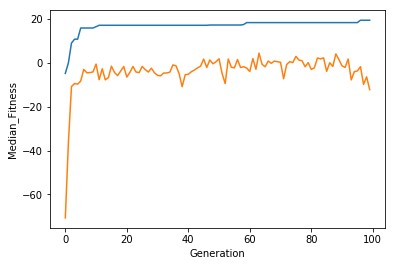

In [4]:
#Plotting Fitness
fitness_frame = pandas.read_csv(fitness_file, sep=" ")
sns.lineplot(x="Generation", y="Best_Fitness", data=fitness_frame)
sns.lineplot(x="Generation", y="Median_Fitness", data=fitness_frame)
#sns.lineplot(x="Generation", y="StdDev", data=fitness_frame)

5003
    Ammunition    Health    Attack
0     0.000158 -0.045402 -0.004163
1     0.296469  0.577553 -0.201978
2     0.536968  0.689602  0.269008
3     0.691305  0.818749  0.299584
4     0.681012  0.634565  0.390614
5     0.656591  0.751505  0.390078
6     0.744866  0.829106  0.634707
7     0.789211  0.801833  0.630740
8     0.786364  0.803667  0.734312
9     0.816878  0.725664  0.680244
10    0.836779  0.817926  0.659438
11    0.850358  0.747530  0.630296
12    0.944308  0.880099  0.724922
13    0.882110  0.771230  0.598911
14    0.878669  0.926421  0.660686
15    0.907112  0.904810  0.700556
16    0.899566  0.814608  0.764803
17    0.848776  0.921419  0.729371
18    0.920614  0.913435  0.794025
19    0.877899  0.921646  0.665222
20    0.843471  0.826195  0.687496
21    0.780695  0.898432  0.751504
22    0.880283  0.951393  0.738392
23    0.879809  0.850650  0.709451
24    0.939562  0.771894  0.799882
25    0.944134  0.908470  0.847775
26    0.959359  0.833471  0.778285
27    0.931472 

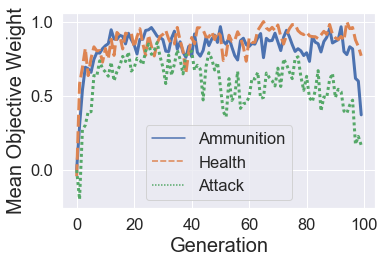

In [109]:

sns.set(font_scale=1.5)

#Plotting NN outputs (that is, objective values) over generations.
nn_out_frame = pandas.read_csv(nn_output_file, sep=" ")#, header=0, names=["Ammo", "Health", "Frags"])
nn_out_frame.rename(columns={"Ammo": "Ammunition",
                              "Health": "Health",
                              "Frags": "Attack"}, inplace=True)
#print(nn_out_frame)
print(len(nn_out_frame))
summmary_nn_outputs=summarize_across_generations(nn_out_frame)
#summmary_nn_outputs.drop(summmary_nn_outputs.tail(1).index,inplace=True) # drop last n rows
#print(summmary_nn_outputs)
summmary_nn_outputs=summmary_nn_outputs.drop("Generation",1) #Dropping since is same as index
print(summmary_nn_outputs)
plt.xlabel("Generation", fontsize=20)
plt.ylabel("Mean Objective Weight", fontsize=20)
ax=sns.lineplot(data=summmary_nn_outputs, linewidth = 3)
fig=ax.get_figure()
fig.tight_layout()
fig.savefig("objectives_over_generations.pdf")


In [6]:
#Remember: 01-ammo, 02-health, 03-frags. 
#Quickly learns the 2 first are the most important.
#In other words: The problem is too simple - strategy does not need
#to depend on current state/measurements.

## Comparing fitnesses

In [16]:
#Hardcoded rules seems to give significantly higher fitnesses?
static_rules_fitnesses = pandas.read_csv(standard_average_rewards_file, names = ["Static"])
print(static_rules_fitnesses)

dynamic_manual_rules_fitnesses = pandas.read_csv(manual_obj_rewards_file, names = ["Hardcoded"])
print(dynamic_manual_rules_fitnesses)

evolved_nn_fitnesses_frame = pandas.read_csv(evolved_objectives_file, names = ["Evolved"])
print(evolved_nn_fitnesses_frame)

       Static
0  -27.833333
1  -43.333333
2  -55.736842
3  -29.000000
4  -23.636364
5  -44.466667
6  -34.461538
7  -48.625000
8  -40.571429
9  -13.700000
10 -16.100000
11 -23.363636
12 -33.000000
13 -20.636364
14 -39.214286
15 -52.944444
16 -11.300000
17 -35.076923
18   6.125000
19  19.000000
    Hardcoded
0   -9.550000
1   -5.736842
2  -17.279070
3  -12.625000
4  -15.707317
5   -7.625000
6  -16.093023
7    2.527778
8  -15.642857
9  -23.454545
10 -13.243902
11  -5.743590
12 -17.930233
13  -0.945946
14  -8.333333
15   3.027778
16 -15.000000
17 -15.904762
18  -7.025000
19  -7.052632
      Evolved
0   11.029412
1   12.117647
2    9.085714
3   13.558824
4    8.285714
5    0.459459
6    8.428571
7    7.657143
8    6.057143
9    1.131579
10   8.485714
11   7.714286
12  -7.195122
13  -6.707317
14   8.228571
15  19.750000
16   7.685714
17  -1.459459
18   8.264706
19   3.108108


In [17]:
import scipy.stats as st
print("Static vs Dynamic: ", st.mannwhitneyu(static_rules_fitnesses, dynamic_manual_rules_fitnesses))
print("Static vs Evolved: ", st.mannwhitneyu(static_rules_fitnesses, evolved_nn_fitnesses_frame))
print("Dynamic vs Evolved: ", st.mannwhitneyu(dynamic_manual_rules_fitnesses, evolved_nn_fitnesses_frame))

Static vs Dynamic:  MannwhitneyuResult(statistic=63.0, pvalue=0.00011110131006840324)
Static vs Evolved:  MannwhitneyuResult(statistic=26.0, pvalue=1.34488434472952e-06)
Dynamic vs Evolved:  MannwhitneyuResult(statistic=19.0, pvalue=5.236370832603736e-07)


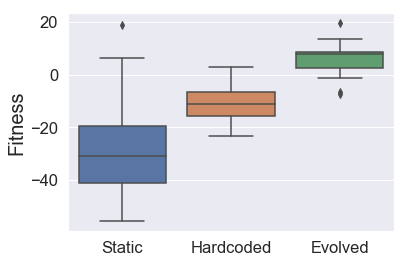

In [90]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
frames = [static_rules_fitnesses, dynamic_manual_rules_fitnesses, evolved_nn_fitnesses_frame]
#print(evolved_nn_fitnesses_frame)
concatenated = pandas.concat(frames, names = ["Static", "Dynamic", "Evolved"],sort=False)
plot=sns.boxplot(data=concatenated)
fig=plot.get_figure()
plt.ylabel("Fitness", fontsize=20)
fig.tight_layout()
fig.savefig('fitness_hard_scenario.pdf', dpi=300)

In [10]:
#Note: There is ammo in the environment, so it's not quite clear
#why evo outperforms hardcode here. Let's check behavior.

## Analyzing Behavior

In [43]:
import numpy as np
behavior_file = "../"+EXPERIMENT_SUBFOLDER+"/nn_behavior_measures_to_objectives.csv"
behavior_frame = pandas.read_csv(behavior_file, sep=" ")
behavior_frame.shape
behavior_frame.rename(columns={"m_ammo": "Current Ammunition",
                              "m_health": "Current Health",
                              "m_frags": "Monsters Killed",
                              "o_ammo":"Ammunition",
                              "o_health":"Health",
                              "o_frags":"Attack"}, inplace=True)
print(behavior_frame)

      Current Ammunition  Current Health  Monsters Killed  Ammunition  Health  \
0                    0.0        1.000000         0.000000    1.000000     1.0   
1                    0.0        1.000000         1.315789    1.000000     1.0   
2                    0.0        1.000000         2.631579    1.000000     1.0   
3                    0.0        1.000000         3.947368    1.000000     1.0   
4                    0.0        1.000000         5.263158    1.000000     1.0   
5                    0.0        1.000000         6.578947    1.000000     1.0   
6                    0.0        1.000000         7.894737    1.000000     1.0   
7                    0.0        1.000000         9.210526    1.000000     1.0   
8                    0.0        1.000000        10.526316    1.000000     1.0   
9                    0.0        1.000000        11.842105    1.000000     1.0   
10                   0.0        1.000000        13.157895    1.000000     1.0   
11                   0.0    

In [86]:
#Method for summarizing and plotting averages for 1 measurement.
def summarize_measurement_and_plot_objectives(dataframe, main_objective):
    meas_to_objectives_array = []
    unique_main_measures = dataframe[main_objective].unique()
    for unique_measure in unique_main_measures:
        #All frames with given value for the column
        sub_frame=dataframe.loc[dataframe[main_objective] == unique_measure]
        objective_means = [sub_frame["Ammunition"].mean(), sub_frame["Health"].mean(),sub_frame["Attack"].mean()]
        meas_to_objectives_array.append([unique_measure,*objective_means])

    meas_to_objectives_array=np.array(meas_to_objectives_array)
    df = pandas.DataFrame(meas_to_objectives_array, columns=[main_objective, 'Ammunition', 'Health', 'Attack'])
    ax=df.plot(x=main_objective, y=['Ammunition', 'Health', 'Attack'], linewidth=5)
    fig=ax.get_figure()
    plt.ylabel("Objective Weight", fontsize=20)
    fig.tight_layout()
    fig.savefig(main_objective.replace(" ","")+".pdf")


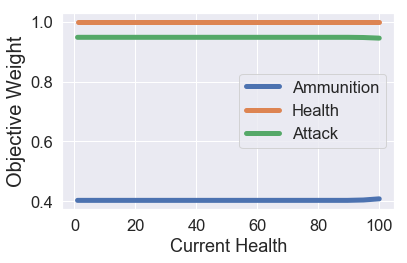

In [87]:
summarize_measurement_and_plot_objectives(behavior_frame, 'Current Health')

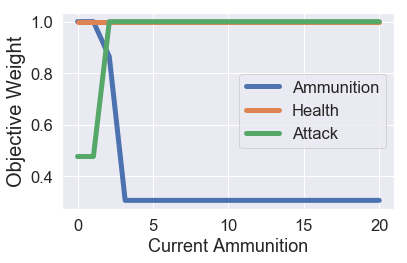

In [88]:
summarize_measurement_and_plot_objectives(behavior_frame, 'Current Ammunition')

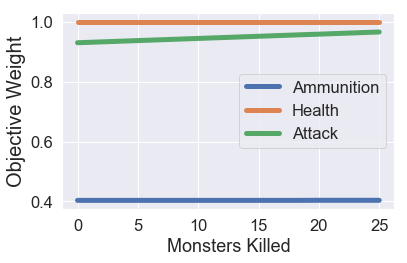

In [89]:
summarize_measurement_and_plot_objectives(behavior_frame, 'Monsters Killed')

In [78]:
!ls

'Analyze D3_battle_low_env_ammo.ipynb'
'Analyze D3_battle_no_ammo.ipynb'
'Analyze D3_battle_original_low_init_health.ipynb'
'Analyze D3_battle_original_low_init_health_no_ammo.ipynb'
'Analyze D3_battle_original_low_init_health_no_ammo_less_death_penalty.ipynb'
'Analyze D3_battle_tiny_health_no_ammo.ipynb'
'Analyze Evolved Strategies Original.ipynb'
'Analyze Evolved Strategies Weak Agent.ipynb'
'Analyze Evolved Strategies Weak Agent-Test-strong-death-penalty.ipynb'
'Analyze Evolved Strategies With Healthy And Dangerous Monsters.ipynb'
'Analyze Evolved Strategies With Healthy Monsters.ipynb'
'Analyze Evolved Strategies With Low ammo and health player.ipynb'
 Analyze_no_ammo_agents.ipynb
'Current Ammunition.pdf'
'Current Health.pdf'
 fitness_hard_scenario.pdf
'Monsters Killed.pdf'
 output.pdf
 output.png
'Plot ANN Behavior.ipynb'
'Plot ANN Behavior-MonsterDmg15.ipynb'
'Plot ANN Behavior-MonsterDmg30.ipynb'
'Plot ANN Behavior Weak Agent.ipynb'


'CurrentHealth'